In [1]:
import warnings
warnings.filterwarnings('ignore') # to suppress some matplotlib deprecation warnings
import ast
import math
import numpy as np
import pandas as pd
from simplification.cutil import simplify_coords
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('test.csv')
df.head()

,key_id,countrycode,drawing
0,9022912629140906,SG,"[[[549, 549, 549, 549, 549, 549, 549, 549, 549..."
1,9399436465240934,TW,"[[[23.20400047302246, 19.23900032043457, 13.81..."
2,9026684540723037,IE,"[[[514, 519, 524, 529, 534, 539, 545, 551, 556..."
3,9678445486746481,RU,"[[[726, 726, 727, 727, 717, 713, 703, 700, 696..."
4,9469133523291747,CA,"[[[133.66700744628906, 132.1219940185547, 130...."


In [3]:
img = ast.literal_eval(df['drawing'][0])
len(img[0])

3

In [4]:
def resample(x, y, spacing=1.0):
    output = []
    n = len(x)
    px = x[0]
    py = y[0]
    cumlen = 0
    pcumlen = 0
    offset = 0
    for i in range(1, n):
        cx = x[i]
        cy = y[i]
        dx = cx - px
        dy = cy - py
        curlen = math.sqrt(dx*dx + dy*dy)
        cumlen += curlen
        while offset < cumlen:
            t = (offset - pcumlen) / curlen
            invt = 1 - t
            tx = px * invt + cx * t
            ty = py * invt + cy * t
            output.append((tx, ty))
            offset += spacing
        pcumlen = cumlen
        px = cx
        py = cy
    output.append((x[-1], y[-1]))
    return output
  
def normalize_resample_simplify(strokes, epsilon=1.0, resample_spacing=1.0):
    if len(strokes) == 0:
        raise ValueError('empty image')

    # find min and max
    amin = None
    amax = None
    for x, y, _ in strokes:
        cur_min = [np.min(x), np.min(y)]
        cur_max = [np.max(x), np.max(y)]
        amin = cur_min if amin is None else np.min([amin, cur_min], axis=0)
        amax = cur_max if amax is None else np.max([amax, cur_max], axis=0)

    # drop any drawings that are linear along one axis
    arange = np.array(amax) - np.array(amin)
    if np.min(arange) == 0:
        raise ValueError('bad range of values')

    arange = np.max(arange)
    output = []
    for x, y, _ in strokes:
        xy = np.array([x, y], dtype=float).T
        xy -= amin
        xy *= 255.
        xy /= arange
        resampled = resample(xy[:, 0], xy[:, 1], resample_spacing)
        simplified = simplify_coords(resampled, epsilon)
        xy = np.around(simplified).astype(np.uint8)
        output.append(xy.T.tolist())

    return output

In [5]:
s_img = normalize_resample_simplify(img)

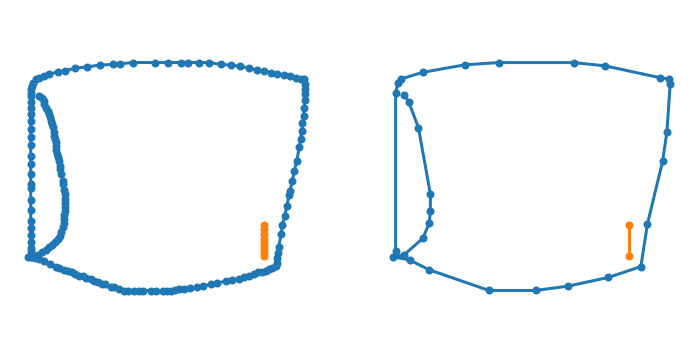

In [6]:
plt.figure(figsize=(6,3))    
for x,y,t in img:
    plt.subplot(1,2,1)
    plt.plot(x, y, marker='.')
    plt.axis('off')

    plt.gca().invert_yaxis()
    plt.axis('equal')

for x,y in s_img:
    plt.subplot(1,2,2)
    plt.plot(x, y, marker='.')
    plt.axis('off')

    plt.gca().invert_yaxis()
    plt.axis('equal')
    
plt.show() 

In [7]:
iimg = np.array(img) 
iimg.shape

(2, 3)

In [8]:
for x, y, t in iimg:
    print(t)

[0, 121, 138, 145, 154, 162, 170, 177, 188, 194, 202, 211, 219, 227, 234, 243, 251, 258, 267, 275, 292, 299, 308, 325, 349, 396, 421, 438, 445, 454, 463, 470, 479, 489, 494, 502, 512, 518, 527, 534, 543, 552, 560, 566, 576, 582, 594, 599, 607, 615, 624, 632, 641, 658, 674, 696, 803, 819, 827, 834, 843, 850, 859, 867, 876, 883, 893, 898, 907, 915, 924, 931, 940, 947, 956, 972, 980, 996, 1012, 1037, 1176, 1193, 1198, 1208, 1214, 1224, 1232, 1239, 1247, 1255, 1263, 1272, 1280, 1291, 1296, 1304, 1312, 1320, 1328, 1337, 1345, 1353, 1369, 1387, 1401, 1418, 1434, 1450, 1459, 1475, 1496, 1500, 1514, 1524, 1531, 1541, 1548, 1556, 1572, 1580, 1598, 1612, 1628, 1645, 1660, 1670, 1689, 1702, 1718, 1734, 1759, 1847, 2054, 2082, 2107, 2139, 2172, 2199, 2220, 2253, 2287, 2312, 2334, 2359, 2374, 2393, 2407, 2423, 2439, 2456, 2472, 2489, 2503, 2520, 2536, 2553, 2569, 2586, 2601, 2617, 2633, 2649, 2666, 2682, 2698, 2715, 2730, 2756, 2771, 2796, 2812, 2836, 2878, 2919, 2942, 2958, 2982, 3082]
[4475, 4570

In [9]:
test_draw = []
splits = []
idx = 0
with open ('draw_raw.txt') as fb:
    lines = fb.readlines()
for i in lines:
    if i == '------\n':
        splits.append(idx)
    idx = idx + 1

In [10]:
splits

[371, 428]

In [17]:
idx = 0
x_list = []
y_list = []
t_list = []
for raw in lines:
    if idx > splits[1]:
        x, y = raw[:-1].split()
        x_list.append(int(x))
        y_list.append(int(y))
        t_list.append(idx * 0.1)
    idx = idx + 1

In [18]:
draw.append([x_list, y_list, t_list])

In [21]:
print(draw)

[[[390, 380, 377, 376, 374, 373, 372, 371, 370, 368, 367, 366, 365, 364, 361, 360, 360, 359, 358, 356, 356, 355, 355, 354, 353, 352, 351, 350, 348, 348, 348, 347, 347, 346, 345, 345, 344, 344, 344, 343, 343, 341, 340, 340, 339, 339, 338, 338, 337, 337, 335, 335, 334, 334, 333, 333, 332, 332, 332, 332, 331, 331, 331, 330, 330, 330, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 329, 329, 329, 329, 330, 330, 330, 330, 330, 331, 331, 331, 331, 331, 332, 332, 332, 332, 332, 332, 332, 333, 333, 333, 334, 334, 334, 336, 336, 337, 337, 338, 339, 340, 342, 343, 343, 344, 344, 345, 346, 348, 349, 350, 350, 351, 352, 352, 353, 354, 356, 358, 359, 360, 360, 362, 362, 363, 364, 364, 367, 368, 369, 370, 370, 372, 374, 374, 376, 378, 380, 381, 382, 383, 384, 386, 387, 388, 389, 393, 396, 398, 399, 401, 403, 404, 405, 408, 416, 418, 419, 420, 422, 424, 427, 432, 433, 436, 437, 438, 439, 440, 442, 445, 447, 452, 453, 454, 455, 456, 459, 461, 466, 467, 46

In [22]:
s_draw = normalize_resample_simplify(draw)

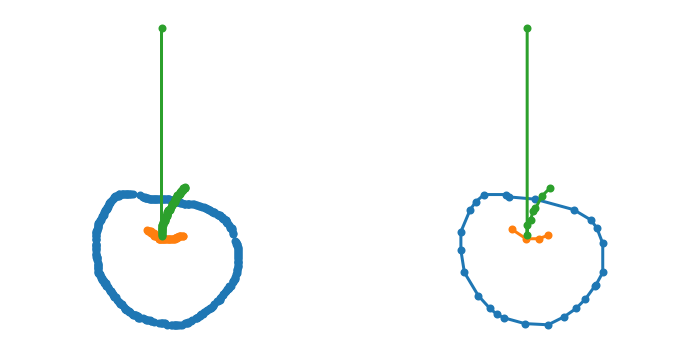

In [23]:
plt.figure(figsize=(6,3))    
for x,y,t in draw:
    plt.subplot(1,2,1)
    plt.plot(x, y, marker='.')
    plt.axis('off')

    plt.gca().invert_yaxis()
    plt.axis('equal')

for x,y in s_draw:
    plt.subplot(1,2,2)
    plt.plot(x, y, marker='.')
    plt.axis('off')

    plt.gca().invert_yaxis()
    plt.axis('equal')
    
plt.show() 

In [24]:
new_draw = {"key_id": 233, "countrycode": 'CN', "drawing": str(draw)}

In [25]:
df = df.append(new_draw, ignore_index=True)

In [27]:
df.to_csv("test.csv", index=False)